### Import the libraries 

In [1]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob
import sys
sys.path.insert(0, './scripts/')

#User defined functions
from undistort_WAHRSIS_imgs import *

### Generation of undistorted image for dataset creation

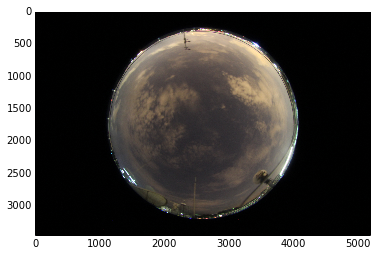

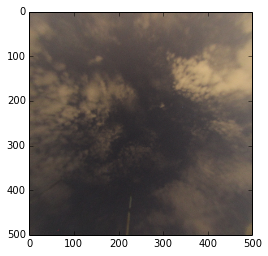

In [2]:
image_loc = './images/RAW/2016-11-20-23-58-04-wahrsis3.jpg'

im = cv2.imread(image_loc)
plt.figure(1)
plt.imshow(im[:,:,[2,1,0]])


unImage = undistortCC(im)
plt.figure(2)
plt.imshow(unImage[:,:,[2,1,0]])
plt.savefig('./results/undisImage.pdf', format='pdf')

### Generate the statistics of cloud coverage (Figure 4)

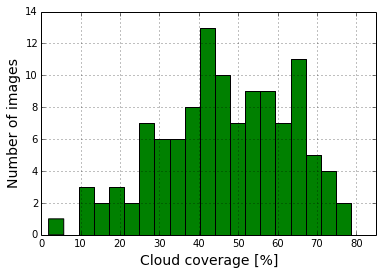

In [7]:
global_files = []

# Change this path to your desired directory that contains the ground-truth images.
start_dir = './nighttime/GT/' 

# Check for all JPEG images if any.
pattern  = "*.jpg"
for direc,_,_ in os.walk(start_dir):
    global_files.extend(glob(os.path.join(direc,pattern)))

selected_files = global_files
selected_files = sorted(selected_files)


coverage = []
for image_path in selected_files:
    
    im = cv2.imread(image_path,0)

    # Changing it to two-level image
    im[im<128]=0
    im[im>128]=255

    cr = len(im[im==255])/(im.size)
    coverage.append(cr)
      
coverage = np.array(coverage)
coverage = 100*coverage

plt.figure(3)
plt.hist(coverage,20,facecolor='green')
plt.xlabel('Cloud coverage [%]', fontsize=14)
plt.ylabel('Number of images', fontsize=14)
plt.xlim((0,85))
plt.grid(True)
plt.savefig('./results/Figure4.pdf', format='pdf')
